##  <font color='red'>This is my little number prediction game. </font>

>The game take a number from user (which named istenilen) and the game generates numbers between 0 and (istenilen-1) istenilen times, that numbers are added to a list. The length of the generated list is istenilen. As we can see every generated number probabilitys are same and also we can see there can be same gerated number in the generated list. So I want to see single the genereted numbers. So if the new generated number is in the generated number list (which named numberlist) then the game does not add the new number to the generated number list. After all of that the game have a number list and you should ask "my number is in side the game's list?"

>if your number is in side then the game show "Your number is in side, You won",  if not "Your number is not inside".

### This part the game generates numbers between 0 and (istenilen-1) istenilen times

In [ ]:
def addFunction(istenilen,giris):
    import random
    numberlist = []  
    for i in range(0,istenilen): #istenilen times generate number
        number = random.randint(0,istenilen-1) #generate number

# if the new generated number is in the generated number list then inornot will be True so "if inornot == False:" will not work
        inornot = number in numberlist                                 
           
#if the new generated number is not in the generated number list then inornot will be False so numberlist.append(number) will work        
        if inornot == False: 
            numberlist.append(number)

# This part, the game checks number of user guess (which named giris)
# If giris is in numberlist inornot2 will be True and if statement work and user sees "Your number is in side, You won"
    inornot2 = giris in numberlist
    if inornot2 == True:
        print("Your number is in side, You won")
    else:
        print("Your number is not inside")
    print(numberlist)

## This part the game takes some numbers from user and checks taken numbers correct.

In [ ]:
def Input():
    
    # Take some numbers from user (which named istenilen, giris) 
    # if there will be any error from input, the game shows "Your input is false, try new input"
    # it keeps working until it gets the correct input 
    while True:
        try:
            istenilen = int(input("Kaç sayılık bir küme istersiniz: "))
        except:
            print("Your input is false, try new input")
            continue
        else:
            break
    
    while True:      
        try:
            giris = int(input(f"What number do you want to guess (Pleace please write a Natural number less than {istenilen}: "))
        except ValueError:
            print("Your input is false, please try a number with integers.")   
        else:    
            break
    
    # the game gives correct taken numbers to addFunction()
    addFunction(istenilen,giris)

# the game starter
Input()  

# This is probability to win, but this part will be after.    
#     probability = 1-((istenilen-1)**istenilen)/(istenilen**istenilen)
#     print(f"Now you wining probability is {probability}")


## In this point I wondered, What is the win probability in this game? ,
>We can find to answer from use some theory but I want to find practically so we need simulation but 

### What is simulation?
>Let's understand together

#### Some people said us "The probability of getting heads or tails is 50%."

>but Are we cristal clear? actually I am not. so what we need to sure? , we need a simulation.

>Now we will fair toss a coin 100 times and we will expect to see the probability of heads is %50.


In [53]:
import random #addd random modul to code
def tossCoin(ntimes):
    # let tails = 1  and heads = 0 
    tossList = [] #create empty list  
    
    # ntimes means how many times we want
    
    for i in range(0,ntimes): #ntimes generate number
        toss = random.randint(0,1) #0 or 1 can be generate
        tossList.append(toss)   #the generated numbers are adding the empty list
    
    #How many have 1 in tossList
    tails= tossList.count(1)  
    #this part gives us final probability
    probability=tails/ntimes
    print(probability)

In [54]:
tossCoin(100)

0.53


### As we can see  the probability almost equal to 0.5 , some times we see 0.44 or 0.54 if we increase ntimes we will be very colse to 0.5
>Let ntimes be equal to 1000

In [56]:
tossCoin(1000)  #So Now we are too close to 0.5

0.504


## Now we want to see probability graph

>We want different moduls 

In [58]:
# import modules which we need
# for manipulating numbers
import numpy as np
import pandas as pd
# for data graph
import matplotlib.pyplot as plt
import seaborn as sbn

In [68]:
import random
def tossCoinData(ntimes):
    # let tails = 1  and heads = 0 
    tossList = []
    countList = [] #We will that use to make a graph 
    for i in range(0,ntimes):
        toss = random.randint(0,1)
        tossList.append(toss)
        
        countList.append(i+1) # this make this [1,2,3,...,ntimes-1,ntimes]
    
    tails= tossList.count(1)  
    probability=tails/ntimes
    print(probability)
    
    #crate DataFrame by usig tossList and column name is Coin Toss
    tossData = pd.DataFrame(tossList,columns=["Coin Toss"])
    #create empty probabiliy list
    probabilityList = []
    count = 0
    for i in range(0,ntimes):   
        if tossData["Coin Toss"][i] == 1:
            count = count + 1
        probability= count/countList[i]
        probabilityList.append(probability)
    
    data = list(zip(tossList,countList,probabilityList))
    tossData = pd.DataFrame(data, columns = ["Coin Toss","Count","Probability"])
    
    return tossData

In [73]:
a=tossCoinData(1000) 
a

0.506


,Coin Toss,Count,Probability
0,0,1,0.000000
1,0,2,0.000000
2,1,3,0.333333
3,1,4,0.500000
4,0,5,0.400000
...,...,...,...
995,0,996,0.504016
996,1,997,0.504514
997,1,998,0.505010
998,1,999,0.505506


In [74]:
a.head() # it shows first 5

,Coin Toss,Count,Probability
0,0,1,0.000000
1,0,2,0.000000
2,1,3,0.333333
3,1,4,0.500000
4,0,5,0.400000


<AxesSubplot:xlabel='Count', ylabel='Probability'>

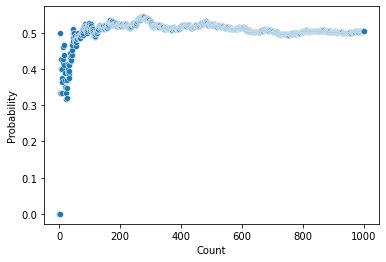

In [75]:
sbn.scatterplot(x="Count",y="Probability",data=a) #as we can see, the probability very close teoric probabiliry so simulation's work.

## Now we learned simulation is working, Let's deploy this simulation the game

### For this part, we don't take numbers from user because we want to more dinamik our code. We give.

In [76]:
# import modules which we need
# for manipulating numbers
import numpy as np
import pandas as pd
# for data graph
import matplotlib.pyplot as plt
import seaborn as sbn

In [111]:
# Which we want to generate number between 0 and 100-1 so game generate like [1,2,3,4,22,43,56,5,9,...]
# [1,2,3,4,22,43,56,5,9,...] this list length will be max 100 element
istenilen  = 100 

simulation = 1000 # Which we want to how many times to try to find our guess (giris), simulation like ntimes in the previous example 

trueFalseList = [] # If our guess in the list then game gives True and simulation add True to this list. Same thing for False.

giris=0 # Our guess is 0 but you can  write any number x (0<= x < istenilen)

countList = [] # We will use this to make a table or graph like Coin Toss

for i in range(0,simulation): # try 1000 times
    numberlist = []  # generated numbers will be adding this list which is single.
    
    # This part almost same Coin Toss, there is a little diffrent
    for a in range(istenilen): 
        number = random.randint(0,istenilen-1)
        inornot = number in numberlist
        if inornot == False:
            numberlist.append(number)
    countList.append(i+1)
    inornot2 = giris in numberlist  # if 0 is in numberList then will be inornot2=True, True will be adding to trueFalseList.
    if inornot2 == True:            # if 0 is not in numberList then will be inornot2=False, False will be adding to trueFalseList.
        trueFalseList.append(inornot2)
    else:
        trueFalseList.append(inornot2)

#adding 2 list combine to 1 list
data = list(zip(trueFalseList,countList))
#create a table from using data and columns names TrueFalse, Count
df = pd.DataFrame(data, columns = ["TrueFalse","Count"])
df

,TrueFalse,Count
0,False,1
1,True,2
2,True,3
3,True,4
4,False,5
...,...,...
995,True,996
996,True,997
997,False,998
998,False,999


In [112]:
probabilityList = []
count = 0
for i in range(0,simulation):   
    if df["TrueFalse"][i] == True:
        count = count + 1
    probability= count/countList[i]
    probabilityList.append(probability)

#adding 3 list combine to 1 list
data = list(zip(trueFalseList,countList,probabilityList))
#create a table from using data and columns names TrueFalse, Count
df = pd.DataFrame(data, columns = ["TrueFalse","Count","Probability"])
df

,TrueFalse,Count,Probability
0,False,1,0.000000
1,True,2,0.500000
2,True,3,0.666667
3,True,4,0.750000
4,False,5,0.600000
...,...,...,...
995,True,996,0.651606
996,True,997,0.651956
997,False,998,0.651303
998,False,999,0.650651


<AxesSubplot:xlabel='Count', ylabel='Probability'>

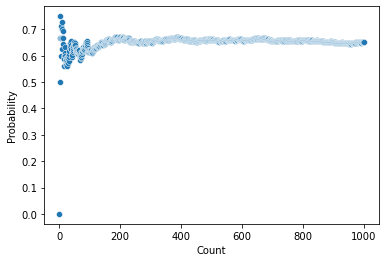

In [113]:
sbn.scatterplot(x="Count",y="Probability",data=df) #as we can see probability graph

In [114]:
probabilityList[-1]  # and its almost 0.630 so %63 is our winning probability

0.651

In [115]:
probability = 1-((istenilen-1)**istenilen)/(istenilen**istenilen) #this is teoric answer so Real probability is this.
print(f"Now you wining probability is {probability}")

Now you wining probability is 0.6339676587267705


In [116]:
print(f" if we increse simulation number this {probabilityList[-1]} will be close {probability} ")

 if we increse simulation number this 0.651 will be close 0.6339676587267705 


>I am not crystal clear but I thing 0.6339676587267705 is real probability for istenilen = 100

#  <font color='red'>For this part will be crazy.</font> 

## Now we are simulate every istenilen from (5,6,7,8,9,...,203,204)

### We will see every probability to win istenilen from (5,6,7,8,9,...,203,204)

In [130]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

istenilen  = 5
simulation = 1000
giris=3
free = []
probabilityList = []
free2 = []
   
for a in range(200): 
    trueFalseList = []
    countList = []
    count=0
    for i in range(0,simulation):
        numberlist = []
        for a in range(0,istenilen):
            number = random.randint(0,istenilen-1)
            inornot = number in numberlist
            if inornot == False:
                numberlist.append(number) 
                
        countList.append(i+1)
        inornot2 = giris in numberlist
        #print(inornot2)
        if inornot2 == True:
            trueFalseList.append(inornot2)
        else:
            trueFalseList.append(inornot2)
                 
    free2.append(istenilen)
    istenilen = istenilen + 1
    
    data = list(zip(trueFalseList,countList))
    df = pd.DataFrame(data, columns = ["TrueFalse","Count"])
    
    for i in range(0,simulation):       
        if df["TrueFalse"][i] == True:
            count = count + 1
            #print(count)
        probability= count/countList[i]
        probabilityList.append(probability)

    free.append(probabilityList[-1])

In [131]:
data = list(zip(free,free2))
df2 = pd.DataFrame(data, columns = ["Probability", "Count"])
df2

,Probability,Count
0,0.660,5
1,0.655,6
2,0.648,7
3,0.626,8
4,0.661,9
...,...,...
245,0.633,250
246,0.620,251
247,0.625,252
248,0.608,253


In [132]:
1000*200 #1000*200 times simulated so 200000 times

200000

<AxesSubplot:xlabel='Count', ylabel='Probability'>

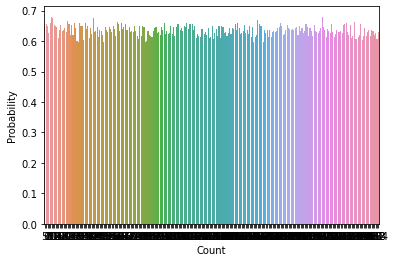

In [133]:
sbn.barplot(x="Count",y="Probability",data=df2)

<AxesSubplot:xlabel='Count', ylabel='Probability'>

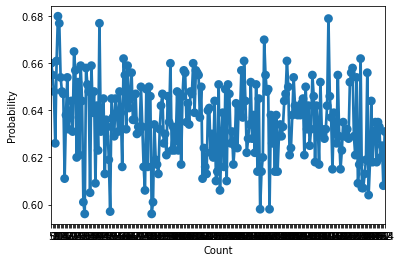

In [134]:
sbn.pointplot(x="Count",y="Probability",data=df2)

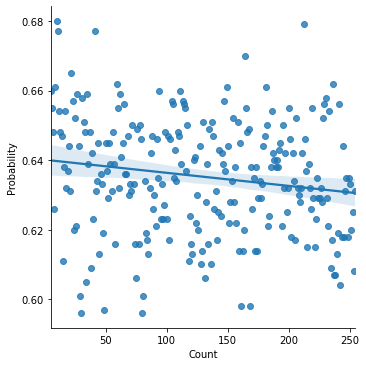

In [135]:
sbn.lmplot(x="Count",y="Probability",data=df2) #As the number istenilen increases, probability to winning decreases.

In [ ]:
d